In [ ]:
!pip install 

Defaulting to user installation because normal site-packages is not writeable
  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)


`HR`

In [4]:
import pandas as pd
import numpy as np
# from category_encoders import OneHotEncoder
from matplotlib import widgets
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from math import remainder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
import os
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from ipywidgets import interact,widgets
os.chdir(r"D:\Datasets")

In [15]:
hr_data = pd.read_csv(r"D:\HR_comma_sep.csv")

In [16]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [18]:
#encoder
enc = OneHotEncoder(sparse_output = False,drop = 'first', handle_unknown = 'ignore')

`Housing`

In [19]:
housing_data = pd.read_csv(r"D:\Datasets\Housing.csv")

In [20]:
housing_data

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [21]:
x = housing_data.drop('price',axis = 1)
y = housing_data['price']

In [28]:
ohe=OneHotEncoder(sparse_output=False,drop="first",handle_unknown="ignore")
trns=ColumnTransformer(transformers=[("ohe",ohe,make_column_selector(dtype_include="object"))],remainder="passthrough",verbose_feature_names_out=False).set_output(transform="pandas")

rf=KNeighborsRegressor()
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
pipe=Pipeline([("TRNF",trns),('SCL',None),("MODEL",rf)])
pipe.get_params()



{'memory': None,
 'steps': [('TRNF', ColumnTransformer(remainder='passthrough',
                     transformers=[('ohe',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001FB9D3BB130>)],
                     verbose_feature_names_out=False)),
  ('SCL', None),
  ('MODEL', KNeighborsRegressor())],
 'transform_input': None,
 'verbose': False,
 'TRNF': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  <sklearn.compose._column_transformer.make_column_sel

In [33]:
params = {'SCL': [None,std_scaler,mm_scaler],'MODEL__n_neighbors':[2,3,4,5,6,7,8,9,10,12]}
kfold = StratifiedKFold(n_splits = 5,random_state = 25,shuffle = True)
gcv = GridSearchCV(pipe,param_grid = params,cv = kfold,scoring = 'r2')
gcv.fit(x,y)

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,estimator,Pipeline(step...Regressor())])
,param_grid,"{'MODEL__n_neighbors': [2, 3, ...], 'SCL': [None, StandardScaler(), ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ohe', ...)]"


In [35]:
gcv.best_params_

{'MODEL__n_neighbors': 6, 'SCL': StandardScaler()}

In [39]:
gcv.best_params_

np.float64(0.6073057434069693)

# Time Series

In [7]:
df = pd.read_csv(r"D:\Datasets\monthly-milk-production-pounds-p.csv")

In [8]:
series = df['Milk']
result = seasonal_decopose(series,model = 'multiplicative',period = 12)
result.plot()
plt.show()

NameError: name 'seasonal_decopose' is not defined

In [53]:
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


# Smoothing

### Rolling Moving Averagae

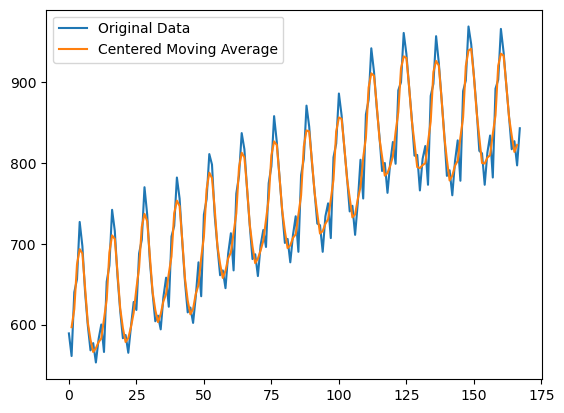

In [9]:
y = df['Milk']
fcast = y.rolling(3,center = True).mean()
plt.plot(y,label ='Original Data')
plt.plot(fcast, label = 'Centered Moving Average')
plt.legend(loc = 'best')
plt.show()

### Trailing Moving  Avergae

In [10]:
y_train = df['Milk'].iloc[:-12]
y_test = df['Milk'].iloc[-12:]

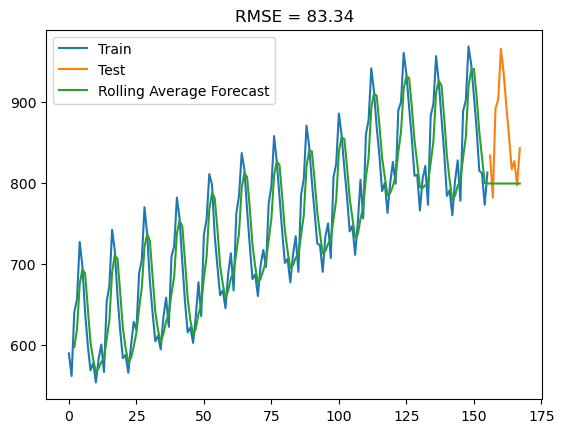

In [11]:
span = 3
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index = True)
rmse = root_mean_squared_error(y_test,MA_series)
plt.plot(y_train,label = 'Train')
plt.plot(y_test,label = 'Test')
plt.plot(MA_fcast,label = 'Rolling Average Forecast')
plt.title(f"RMSE = {rmse:.2f}")
plt.legend(loc = 'best')
plt.show()

In [ ]:
#forecasting(pred) is going flast and actual test is different

### Simple Exponenetial Smoothing

In [12]:
alpha = 0.1

In [13]:
ses = SimpleExpSmoothing(y_train)
def simple_exp():
    fit1 = ses.fit(smoothing_level = alpha)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color = 'pink',label = 'Test')
    fcast1.plot(color = 'purple',label = 'Forecast')
    rmse = root_mean_squared_error(y_test,fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}")
    plt.legend(loc="best")
    plt.show()
widgets.interact(simple_exp,alpha = (0.01,1,0.01))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.simple_exp()>

`FREDNROST`

In [72]:
data = pd.read_csv(r"D:\Datasets\FRED-NROUST.csv")

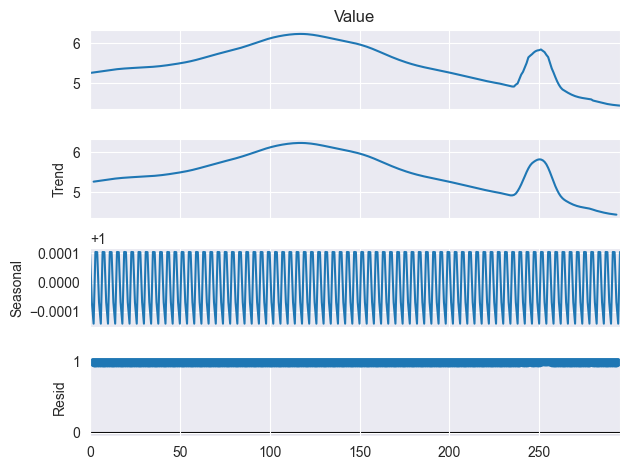

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = data['Value']
result = seasonal_decompose(series,model = 'multiplicative',period = 4)
result.plot()
plt.show()

<Axes: xlabel='Date'>

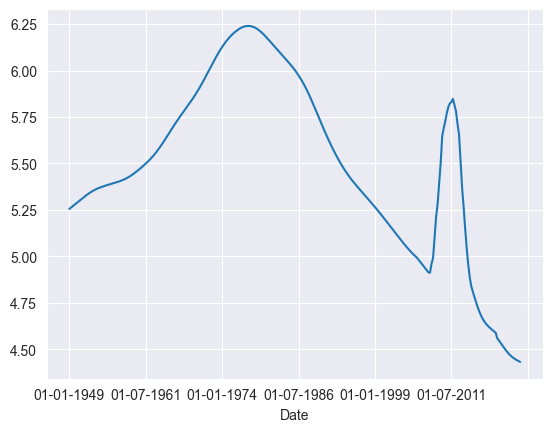

In [74]:
data.set_index('Date')['Value'].plot()

In [78]:
y_train = data['Value'][:-30]
y_test = data['Value'][-30:]

In [79]:
alpha = 0.1
ses = SimpleExpSmoothing(y_train)


def simple_exp():
    fit1 = ses.fit(smoothing_level=alpha)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    fcast1.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}")
    plt.legend(loc="best")
    plt.show()


widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.simple_exp()>